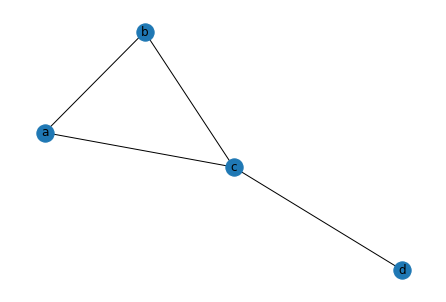

In [3]:
import networkx as nx
# Undirectd Graph
G=nx.Graph()
G.add_node('a')
nodes_to_add=['b','c','d']
G.add_nodes_from(nodes_to_add)
G.add_edge('a','b')
edges_to_add=[('a','c'),('b','c'),('c','d')]
G.add_edges_from(edges_to_add)
nx.draw(G,with_labels=True)

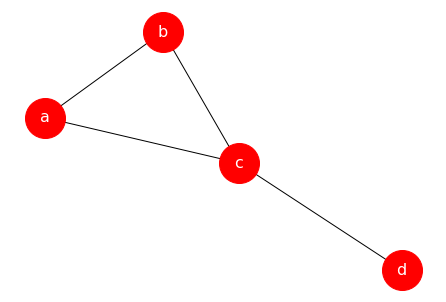

In [2]:
nx.draw(G,with_labels=True,node_color='red',node_size=1600,font_color='white',font_size=16)

In [3]:
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [4]:
G.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

In [5]:
#NodeView and EdgeView objects have iterators, so we can use them in for loops:
for node in G.nodes:
    print(node)

a
b
c
d


In [6]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


In [8]:
G.number_of_nodes()

4

In [9]:
G.number_of_edges()

4

In [10]:
G.neighbors('b')

In [11]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


In [12]:
list(G.neighbors('b'))

['a', 'c']

In [13]:
nx.is_tree(G)

False

In [14]:
nx.is_connected(G)

True

In [15]:
G.has_node('a')

True

In [16]:
G.has_node('x')

False

In [17]:
'd' in G.nodes()

True

In [18]:
G.has_edge('a','b')

True

In [19]:
G.has_edge('a','d')

False

In [20]:
('c','d')in G.edges

True

In [21]:
len(list(G.neighbors('a')))

2

In [22]:
G.degree('a')

2

In [23]:
# EXERCISE 1
#get_leaves that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.
def get_leaves(g):
    leaves=[]
    for node in g.nodes:
        if g.degree(node)==1:
            leaves.append(node)
    return leaves
get_leaves(G)

['d']

In [40]:
## this code change Previous edges 
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])
print( get_leaves(G) == list({'c', 'b'}) ) 
set(get_leaves(G)) == {'c', 'b'}

True


True

In [41]:
#Aside: comprehensions
#Often we have one sequence of values and we want to generate a new sequence by applying an operation to each item in the first.
print(G.nodes())
print([G.degree(n)for n in G.nodes()])

['a', 'b', 'd', 'c']
[2, 1, 2, 1]


In [42]:
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

In [43]:
#way1
g = (len(item) for item in items)
list(g)

[6, 1, 6]

In [44]:
#way 2 like way1
g = [len(item) for item in items]
list(g)

[6, 1, 6]

In [46]:
max(len(item) for item in items)

6

In [47]:
sorted(item.upper()for item in items)

['BANANA', 'SPIDER', 'Y']

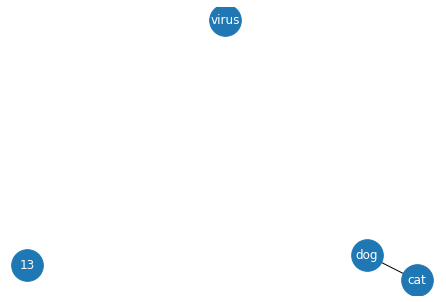

In [59]:
G=nx.Graph()
G.add_nodes_from(['cat','dog','virus',13])
G.add_edge('cat','dog')
nx.draw(G,with_labels=True,font_color='white',node_size=1000)

In [4]:
#Adjacency lists
print(open('friends.adjlist').read())


George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly


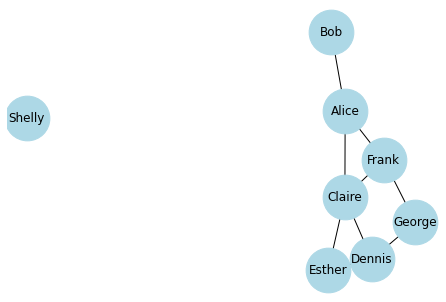

In [9]:
SG=nx.read_adjlist('friends.adjlist')
nx.draw(SG,node_size=2000,node_color='lightblue',with_labels=True)

In [8]:
SG.degree('Alice')

3

In [34]:
# Excercise 2
#function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.
def max_degree(g):
    maxTuple=list(g.degree())[0]    #list(g.degree()) return list of tupels , every tupel is node and degree
    for tuple in list(g.degree()):
        if tuple[1]>maxTuple[1]:
            maxTuple=tuple
    return maxTuple
max_degree(SG)

('Claire', 4)

In [36]:
max_degree(SG) == ('Claire', 4)

True

In [37]:
# Excercise 3
#  function mutual_friends that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes.
def mutual_friends(sg, node_1, node_2):
    neighbors=[]
    for node1 in sg.neighbors(node_1):
        for node2 in sg.neighbors(node_2):
            if node1==node2:
                neighbors.append(node1) #oe node2

    return neighbors
mutual_friends(SG,'Alice', 'Claire') 

['Frank']

In [38]:
mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

True

In [39]:
mutual_friends(SG, 'George', 'Bob') == []

True

In [40]:
sorted(mutual_friends(SG, 'Claire', 'George')) == ['Dennis', 'Frank']

True

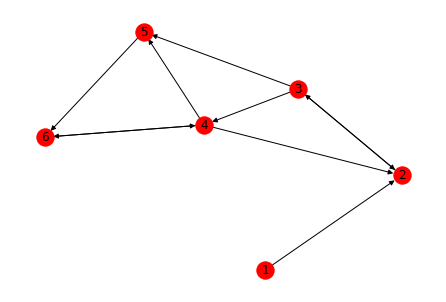

In [20]:
D=nx.DiGraph()
D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])
nx.draw(D,with_labels=True,node_color='red')

In [83]:
D.has_edge(1,2)

True

In [84]:
D.has_edge(2,1)

False

In [91]:
print('Successors of 2:',list(D.successors(2)))
print('predecessors of 2:',list(D.predecessors(2)))

Successors of 2: [3]
predecessors of 2: [1, 3, 4]


In [90]:
D.in_degree(2)

3

In [92]:
D.out_degree(2)

1

In [93]:
D.degree(2)

4

In [95]:
# neighbors in directive Graph not All nodes linked to given node , it is just successors
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]
